<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [6]</a>'.</span>

# Preprocess and Sanity Check

In [1]:
%cd ../
%config InlineBackend.figure_format='retina'

import logging
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.getipython import get_ipython
from src.canonical_analysis.subspace_comm import CCARegions
from src.spikeloader import SpikeLoader

sns.set()
get_ipython().run_line_magic("config", "InlineBackend.figure_format='retina'")

/groups/stringer/home/josephs2/janelia2020


In [2]:
# logging.getLogger().setLevel(logging.INFO)
path_npz = '/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.npz'

In [3]:
# Parameters
path_npz = (
    "/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.npz"
)
path_loader = (
    "/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.hdf5"
)
path_rf = (
    "/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.hdf5"
)
path_gabor = (
    "/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.hdf5"
)


In [4]:
load_hdf5=False
if Path(out_file := Path(path_npz).with_suffix(".hdf5")).exists() and load_hdf5:
    logging.info("HDF5 exists, loading.")
    loader = SpikeLoader.from_hdf5(out_file)
else:
    logging.info("Reading from npz.")
    loader = SpikeLoader.from_npz(path_npz)
    logging.info("Saving to HDF5.")
    loader.save(out_file, overwrite=True)

(13860, 2034)


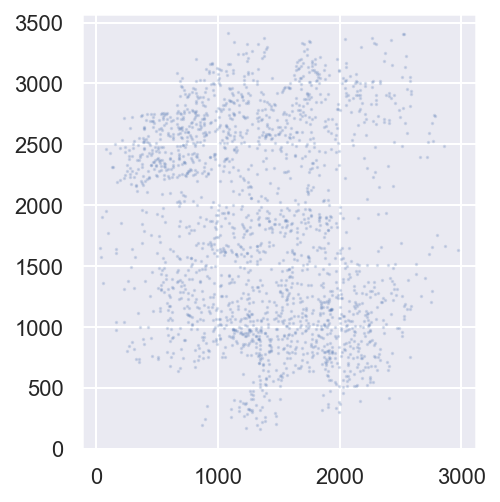

In [5]:
fig, ax = plt.subplots()
ax.scatter(loader.pos.x, loader.pos.y, s=0.5, alpha=0.2)
ax.set_aspect("equal")

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [6]:
print(f"(Stim x Neu): {loader.spks.shape}")
print(f"Number of spont frames: {loader.idx_spont.size}")
print(f"Repeated stims: {loader.get_idx_rep().shape}")

(Stim x Neu): (13860, 2034)
idx_spont [    0     1     3 ... 29794 29796 29798]


AssertionError: 

### Correlations between the spiking responses of repeated and non-repeated stimuli.

In [ ]:
def corr_check(idx1, idx2, name):
    corr = CCARegions.pairwise_inner_prod(loader.S[idx1, :], loader.S[idx2, :], normalize=True)
    ax = sns.distplot(corr, label=name)
    ax.set_title("Correlations between stim")
    ax.set_xlabel("Pearson's $r$")
    return ax


rep = loader.get_idx_rep()
corr_check(rep[:1000, 0], rep[:1000, 1], "Repeat")
corr_check(np.arange(1000), np.arange(1000, 2000), "Non-repeat")
plt.legend()